In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data_win_prediction.csv",sep=";")

In [3]:
df.Team_A_avg_win_percentage = df.Team_A_avg_win_percentage.str.replace(",",".").astype(float)
df.Team_B_avg_win_percentage = df.Team_B_avg_win_percentage.str.replace(",",".").astype(float)
df.Team_A_avg_KR = df.Team_A_avg_KR.str.replace(",",".").astype(float)
df.Team_A_avg_elo = df.Team_A_avg_elo.str.replace(",",".").astype(float)
df.Team_B_avg_KR = df.Team_B_avg_KR.str.replace(",",".").astype(float)

In [4]:
df.shape

(1465, 9)

In [5]:
values_to_remove = ['aim_map', 'awp_india', 'aim_crashz_dust_1on1', 'de_ravine', 'de_foroglio', 'awp_orange', 'awp_lego_2', 'aim_redline','dorf']
df = df[~df['map'].isin(values_to_remove)]

In [6]:
df = df.drop(columns=["map","\tMatch ID"])

In [7]:
df.head()

,win,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo
0,team a,58.864865,0.726308,1720.4,47.289216,0.792615,1536
1,team a,52.341629,0.764807,1989.6,54.823232,0.762641,2073
2,team b,20.202020,0.773030,753.8,66.095238,0.722705,158
3,team b,48.414652,0.733409,2565.0,62.631108,0.838246,2219
4,team b,43.571196,0.709982,1484.4,55.513072,0.768946,1352


In [8]:
df.shape

(1452, 7)

In [9]:
df.head()

,win,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo
0,team a,58.864865,0.726308,1720.4,47.289216,0.792615,1536
1,team a,52.341629,0.764807,1989.6,54.823232,0.762641,2073
2,team b,20.202020,0.773030,753.8,66.095238,0.722705,158
3,team b,48.414652,0.733409,2565.0,62.631108,0.838246,2219
4,team b,43.571196,0.709982,1484.4,55.513072,0.768946,1352


In [96]:
df.win = df.win.map({"team a":0, "team b":1})

In [11]:
df.head(30)

,win,Team_A_avg_win_percentage,Team_A_avg_KR,Team_A_avg_elo,Team_B_avg_win_percentage,Team_B_avg_KR,Team_B_avg_elo
0,team a,58.864865,0.726308,1720.40,47.289216,0.792615,1536
1,team a,52.341629,0.764807,1989.60,54.823232,0.762641,2073
2,team b,20.202020,0.773030,753.80,66.095238,0.722705,158
3,team b,48.414652,0.733409,2565.00,62.631108,0.838246,2219
4,team b,43.571196,0.709982,1484.40,55.513072,0.768946,1352
5,team b,29.802198,0.596095,1443.40,45.317460,0.690571,1632
6,team a,78.428571,0.710000,1477.80,41.653680,0.738472,1402
7,team b,57.478632,0.832873,1439.75,49.929732,0.703501,1434
8,team b,47.589744,0.712493,1074.20,62.779785,0.801344,574
9,team b,39.023199,0.674990,1217.80,54.019841,0.777099,1574


In [98]:
X, y = df.drop(columns=["win"]), df.win

In [99]:
columns = X.columns.to_list()

In [100]:
scaler = MinMaxScaler()

In [101]:
X_scaled = scaler.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(X_scaled, columns=columns), y, test_size=0.33, random_state=42)

In [103]:
#X_train, X_test, y_train, y_test = train_test_split(
#   X, y, test_size=0.33, random_state=42)

In [104]:
def train_models(X_train, y_train, X_test, y_test):
    models = [
        RandomForestClassifier(max_depth=3, random_state=42),
        LogisticRegression(random_state=42),
    ]
    model_names = [model.__class__.__name__ for model in models]

    f1_score_list = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    data = {}
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_score_list.append(f1_score(y_test, y_pred))
        accuracy_list.append(accuracy_score(y_test, y_pred))
        recall_list.append(recall_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        
    data["model"] = model_names
    data["f1_score"] = f1_score_list
    data["accuracy"] = accuracy_list
    data["recall"] = recall_list
    data["precision"] = precision_list
    
    return data

In [105]:
func = train_models(X_train, y_train, X_test, y_test)

In [106]:
models_df = pd.DataFrame(func)

In [107]:
models_df

,model,f1_score,accuracy,recall,precision
0,RandomForestClassifier,0.800759,0.781250,0.827451,0.775735
1,LogisticRegression,0.799250,0.777083,0.835294,0.766187


In [108]:
model = LogisticRegression()
grid_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
clf = GridSearchCV(model, grid_params)
clf.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [109]:
clf.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

ЦЕЛЕВОЙ Precision: > 0.9
НАЙДЕННЫЙ ПОРОГ: 0.823
Precision при этом пороге: 0.904
Recall при этом пороге: 0.482

ОТЧЕТ КЛАССИФИКАЦИИ С ВЫСОКИМ PRECISION:
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       225
           1       0.90      0.48      0.63       255

    accuracy                           0.70       480
   macro avg       0.76      0.71      0.69       480
weighted avg       0.77      0.70      0.68       480



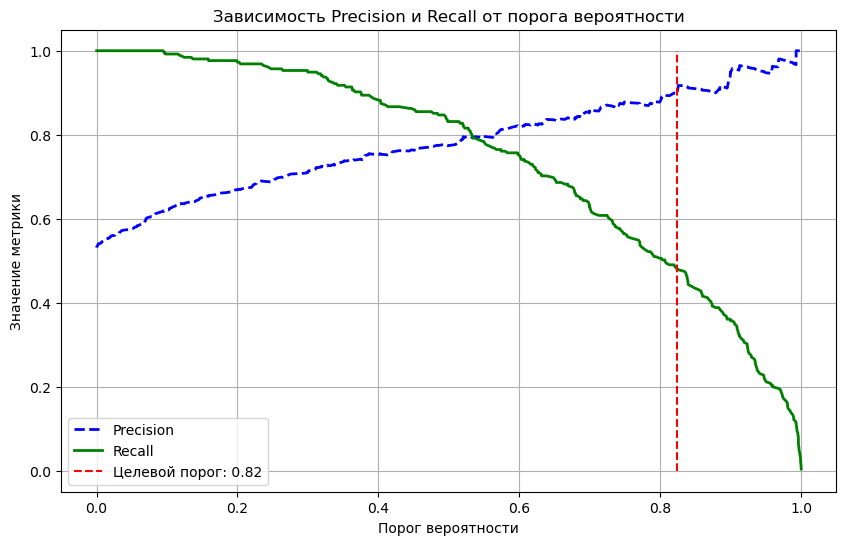

In [110]:
# 1. Получаем вероятности победы (вместо обычных предсказаний)
y_scores = clf.predict_proba(X_test)[:, 1]  # Берем вероятности для класса 1 (победа)

# 2. Считаем precision и recall для всех возможных порогов
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Ищем порог для Precision > 0.9
target_precision = 0.9
# Находим ПЕРВЫЙ порог, где precision превышает нашу цель
index = np.argmax(precisions > target_precision)
target_threshold = thresholds[index]

print("=" * 50)
print(f"ЦЕЛЕВОЙ Precision: > {target_precision}")
print(f"НАЙДЕННЫЙ ПОРОГ: {target_threshold:.3f}")
print(f"Precision при этом пороге: {precisions[index]:.3f}")
print(f"Recall при этом пороге: {recalls[index]:.3f}")
print("=" * 50)

# 4. Делаем предсказания с высоким Precision
# Если вероятность > порога - предсказываем победу (1), иначе - поражение (0)
y_pred_high_precision = (y_scores >= target_threshold).astype(int)

# 5. Смотрим на результат
print("\nОТЧЕТ КЛАССИФИКАЦИИ С ВЫСОКИМ PRECISION:")
print(classification_report(y_test, y_pred_high_precision))

# 6. Рисуем график
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(x=target_threshold, ymin=0, ymax=1, colors='red', linestyles='dashed', 
           label=f'Целевой порог: {target_threshold:.2f}')
plt.xlabel('Порог вероятности')
plt.ylabel('Значение метрики')
plt.title('Зависимость Precision и Recall от порога вероятности')
plt.legend()
plt.grid(True)
plt.show()
